# **Loan Default Prediction**

## **Executive summary**

Giving out loans is challenging for banks because of loan default risk. This can have a big effect on financial losses, so identifying clients who default on loans would minimize that risk. In this project, our goal was to build a predictive classification model that identifies defaulters, minimizes loan default risk and ensures bank compliance with the Equal Credit Opportunity Act.

We performed data preprocessing, modelling, and evaluation to create a classification machine learning model that will reduce default risk and help the bank make better decisions when it comes to approving loans. We performed univariate, bivariate, and multivariate analyses to visualise the data. For data preprocessing, we treated outliers and missing values.

The machine learning models were created using a split of test and training data of 30% and 70% respectively. We created a logistic regression model, a decision tree model, a tuned decision tree model, a random forest model and a tuned random forest model. The models were tuned using GridSearchCV.

The important findings from the analysis reveal that 20% of applicants default on their loans, indicating a significant class imbalance. Key features that influence default risk include the debt-to-income ratio, the number of delinquent credit lines, and the age of credit inquiries. The purpose of the loan also plays a substantial role, with debt consolidation being the most common purpose.

The proposed model focuses on maximizing recall to ensure that defaulters are identified, even at the cost of some precision. A tuned decision tree model was selected because its recall is the highest of all of the models, 76% of defaulters. Despite other models such as random forest, achieving higher accuracy, this model provides the best recall, making it suitable for predicting defaults while minimizing financial risks for the bank.

To improve the recall and accuracy further, further fine-tuning of the model could be implemented, such as pruning the tree to prevent overfitting. Additionally, the performance needs to be monitored after deployment to ensure good performance and adjust the solution as needed. If we consider that in real life the datasets are usually larger, we should think about scaling our solution to ensure it can handle large data.

## **Import the necessary libraries and Data**

In [184]:
	
# Import libraries for reading, visualizing and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Decision tree, Random Forest algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Model performance evaluation imports
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score, recall_score, accuracy_score
from sklearn import metrics

# Hyperparameter tuning imports
from sklearn.model_selection import GridSearchCV

<b>Reading the dataset</b>

In [185]:
# Read the data
lead = pd.read_csv('/Users/marija/Documents/MIT Data Science 24\'/Capstone Project/Milestone Project/hmeq.csv')

In [186]:
# Copy the data in a new variable
df = lead.copy()

<b>Understanding the shape of the dataset</b>

In [187]:
# Calculate the number of rows and columns
dimensions = df.shape
# Print how many rows and columns are in the database
print(dimensions)

(5960, 13)


<b>Observations:</b>
- The number of rows in the database is 5960 and the number of columns is 13.

<b>Getting first and last 5 rows</b>

In [188]:
# Returns the first 5 rows
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [189]:
# Returns the last 5 rows
df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


<b>Checking the data types</b>

In [190]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


<b>Observations:</b>
- There are 11 numerical columns (9 floats, 2 integers)
- There are 2 object type columns
- Not all columns have the same number of entries, this means that there might be missing values in the dataset

<b>Checking for missing values</b>

In [191]:
# Add up any missing values in each column
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

<b>Observations:</b>
- All columns have missing values except from BAD and LOAN columns
- DEBTINC has the most missing values, 1267 of them.

<b>Checking for duplicated values</b>

In [192]:
# Checking for duplicates in the dataset
df.duplicated().sum()

0

<b>Observations:</b>
- No duplicates found

<b>Checking the count of unique values</b>

In [193]:
# Checking the count of unique values in each column
df.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

<b>Observations</b>
- BAD, REASON, and JOB are categorical values.
- LOAD, MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, and DEBTINC are continuous variables.
- There are no columns that should be dropped because none of them have 5960 unique variables.

## Summary Statistics

- Observations from Summary Statistics

In [194]:
# Statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


<b>Observations:</b>
- The average amount due on the existing mortgage is \\$18608. The maximum amount is \\$89900 which is significantly higher than the average. The median is \\$16300 which is less than the average and indicates a right skew distribution.
- The average loan amount is \\$73761. The maximum amount is \\$399550 which is significantly higher than the average. The median is \\$65019 which is less than the average and indicates a slight right skew distribution.
- The average current value of the property is \\$101776. The maximum amount is \\$855909 which is significantly higher than the average. The median is \\$89236 which is less than the average and indicates a right skew distribution.

In [195]:
# List of categorical variables
cat_col = list(df.select_dtypes("object").columns)

# Value proportions for BAD binary value
print(df['BAD'].value_counts(1))
print("-" * 50)

# Value proportions in every column
for column in cat_col:
    # Using 1 to normalize the proportion
    print(df[column].value_counts(1))
    print("-" * 50)

0    0.800503
1    0.199497
Name: BAD, dtype: float64
--------------------------------------------------
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
--------------------------------------------------
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
--------------------------------------------------


<b>Observations:</b>
- 80% of applicants repaid their loans. 20% defaulted on their loans, that is only 1/5 of all applicants.
- 69% of applicants requested a loan for debt consolidation, 31% requested a loan for home improvement.
- Almost half (42%) of all applicants work in other sectors than the ones listed. 22% work as professional executives, 17% work at offices, 14% work in migration, 3% are self-employed and 2% of all applicants are in sales.

## **Exploratory Data Analysis (EDA) and Visualization**

### **Univariate Analysis**


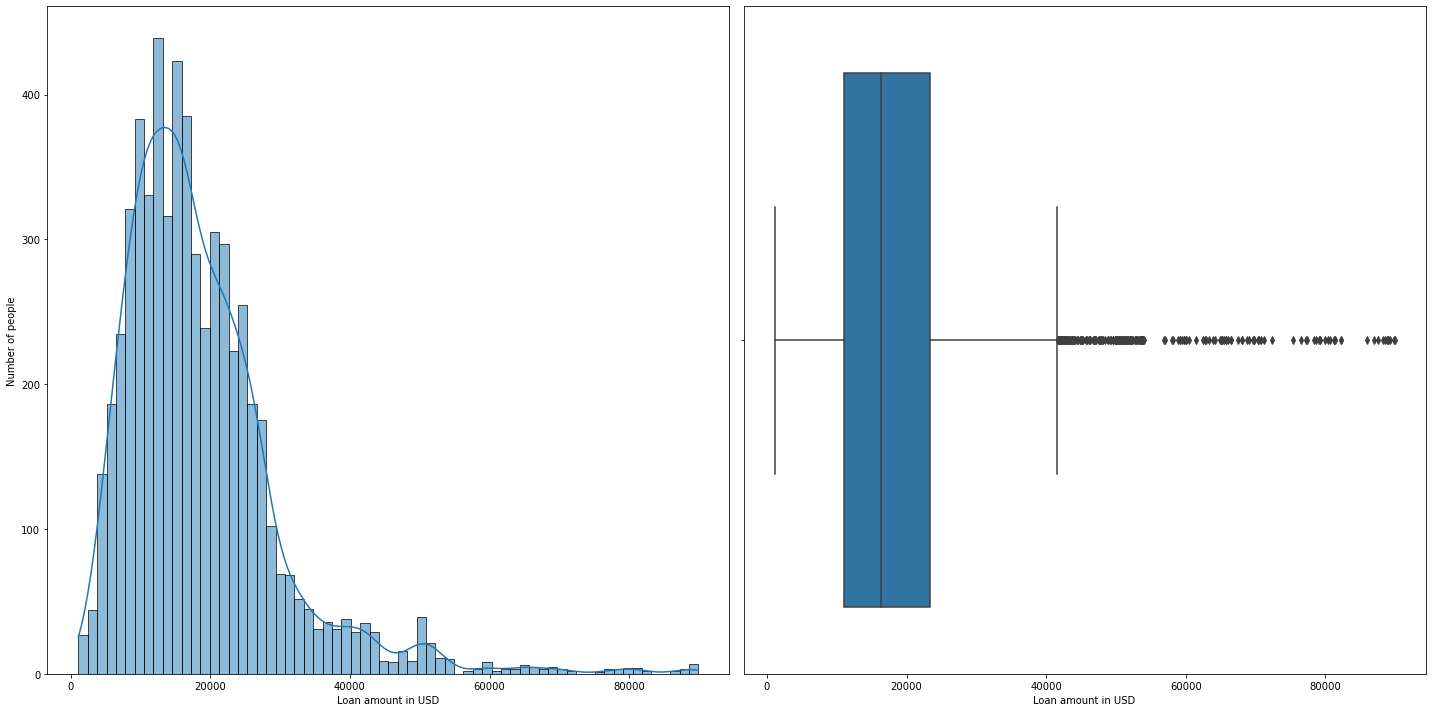

In [196]:
# Question: What is the range of values for the loan amount variable "LOAN"?

# Increase plot size
plt.figure(figsize=(20, 10))

# Make the first subplot (one row, two columns, first plot)
plt.subplot(1, 2, 1)
# Histogram: Loan amount per person
sns.histplot(x = df['LOAN'], kde=True)
plt.xlabel("Loan amount in USD")
plt.ylabel("Number of people")

# Second subplot
plt.subplot(1, 2, 2)
# Boxplot: Loan amount per person
sns.boxplot(x = df['LOAN'])
plt.xlabel("Loan amount in USD")

# Show the two plots
plt.tight_layout()
plt.show()

<b>Observations:</b>
- By using Kernel density estimation in the histogram, we see that data is positively skewed.
- Most applicants take out loans worth about \\$16000 judging from the histogram.
- From the boxplot, we can observe that the median is about \\$16000 as well.
- The interquartile range is between 0 and 42000 dollars.
- There are a lot of outliers on the right which indicates a right skewed distribution.
- Overall the amount of loan ranges between 0 and 90000 USD.

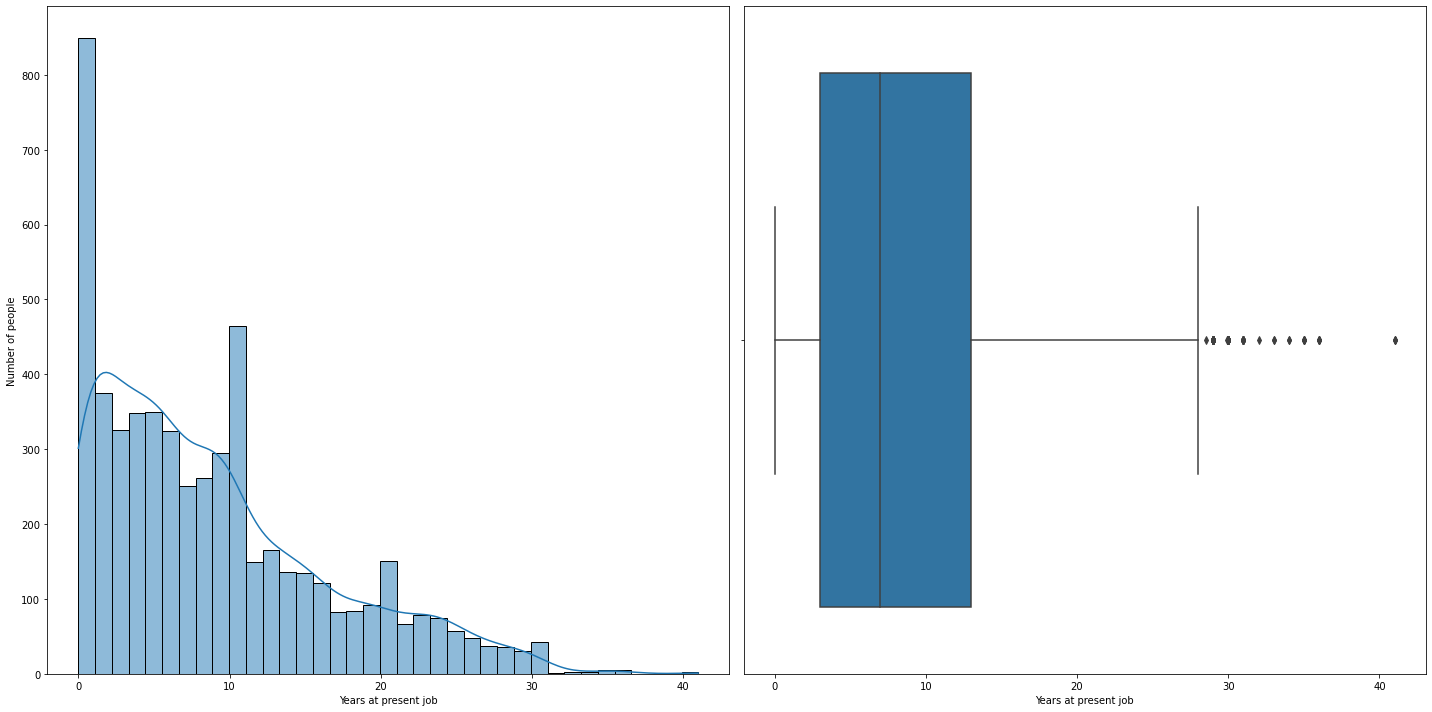

In [197]:
# Question: How does the distribution of years at present job "YOJ" vary across the dataset?

# Increase plot size
plt.figure(figsize=(20, 10))

# Make the first subplot (one row, two columns, first plot)
plt.subplot(1, 2, 1)
# Histogram: how many years the applicants worked at their current job
sns.histplot(x = df['YOJ'], kde=True)
# Label axes
plt.xlabel("Years at present job")
plt.ylabel("Number of people")

# Second subplot
plt.subplot(1, 2, 2)
# Boxplot: how many years the applicants worked at their current job
sns.boxplot(x=df['YOJ'])
plt.xlabel("Years at present job")

# Show the two plots
plt.tight_layout()
plt.show()

<b>Observations:</b>
- By using Kernel density estimation in the histogram, we see that data is positively skewed.
- Most applicants (850) have little to no work experience, up to a year at their present job.
- From the boxplot, we can observe that the median is about 7 years.
- The interquartile range is between 0 and 28 years.
- There are a lot of outliers on the right which indicates a right skewed distribution.

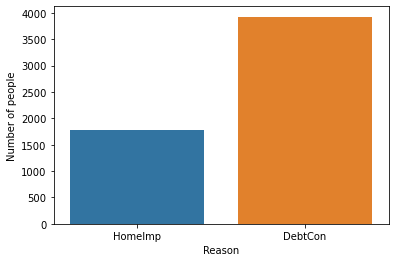

In [198]:
# Question: How many unique categories are there in the REASON variable?

# Count plot: Reason for loan
sns.countplot(x = df['REASON'])

# Label axes
plt.xlabel("Reason")
plt.ylabel("Number of people")
plt.show()

<b>Observations:</b>
- There are two categories when choosing the reason for a loan, home improvement or  debt consolidation.
- 4000 applicants took out the loan for debt consolidation, which is two times more than 1800 of applicants who took out the loan for home improvement.

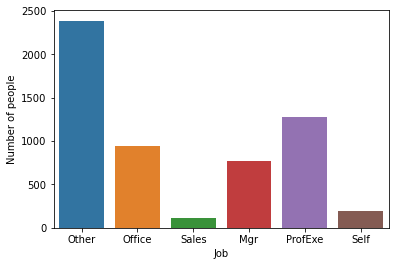

In [199]:
# Question: What is the most common category in the JOB variable?

# Count plot: Jobs of applicants
sns.countplot(x = df['JOB'])

# Label axes
plt.xlabel("Job")
plt.ylabel("Number of people")
plt.show()

<b>Observations:</b>
- There are 6 job categories for applicants: Self, professional executive, migration, sales, office and other.
- Most applicants (2400) have other occupations, that is two times more than the next most popular job which is professional executive with 1400 people. It is followed by office, migration, self employed and sales in descending order.

### **Bivariate Analysis**

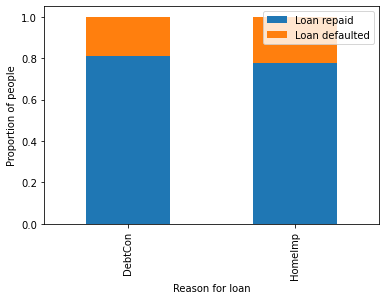

In [200]:
# Question: Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?

# Stacked bar plot: defaulting status vs reason for the loan proportion
tab = pd.crosstab(df['REASON'], df['BAD'], normalize='index')
tab.plot(kind='bar', stacked=True)

# Label axes
plt.xlabel('Reason for loan')
plt.ylabel('Proportion of people')
plt.legend(['Loan repaid', 'Loan defaulted'])
plt.show()

<b>Observations:</b>
- A higher percentage of people, about 25% defaulted on loans when the reason for their loan was home improvement compared to those whose reasons were debt consolidation (20%).
- This could be caused by unexpected expenses that arise when doing home improvements or because it is likely that people who took out loans to repay their other liabilities, took out other loans to repay this one.

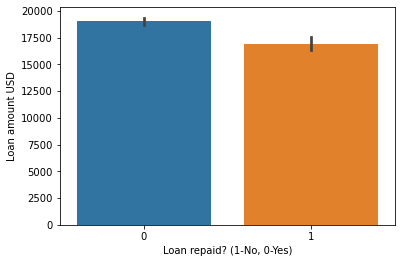

In [201]:
# Question: Do applicants who default have a significantly different loan amount compared to those who repay their loan?

# Bar plot: Amount of loan taken out vs if the loan 
sns.barplot(x=df['BAD'], y=df['LOAN'])

# Label axes
plt.xlabel('Loan repaid? (1-No, 0-Yes)')
plt.ylabel('Loan amount USD')
plt.show()

<b>Observations:</b>
- If the loan was repaid, the average loan amount is higher, about \\$18000.
- If the loan was defaulted, the average loan amount is slightly lower, about \\$17000.
- The difference is only \\$1000 so it is not significant.

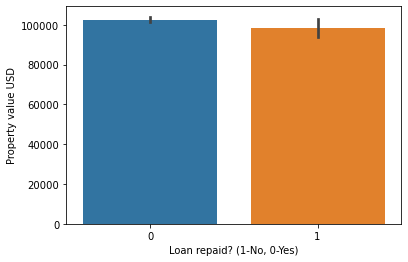

In [202]:
# Question: Is there a correlation between the value of the property and the loan default rate?

# Bar plot: Amount of loan taken out vs if the loan was repaid
sns.barplot(x=df['BAD'], y=df['VALUE'])

# Label axes
plt.xlabel('Loan repaid? (1-No, 0-Yes)')
plt.ylabel('Property value USD')
plt.show()

<b>Observations:</b>
- On average, those who repay their loans have properties of higher value, over 100000 USD.
- Those who default on loans own properties that are less valuable on average, about 90000 USD.
- The difference is not significant, only about 10000 USD.
- There is a slight negative correlation between property value and loan repayment.

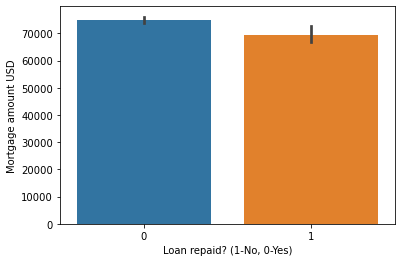

In [203]:
# Question: Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

# Bar plot: Amount of loan taken out vs if the loan was repaid
sns.barplot(x=df['BAD'], y=df['MORTDUE'])

# Label axes
plt.xlabel('Loan repaid? (1-No, 0-Yes)')
plt.ylabel('Mortgage amount USD')
plt.show()

<b>Observations:</b>
- Those who default have on average lower amount of mortgage, about 65000 USD, than those who repay their loan, about an average of 75000 USD.
- This might be because they use up all of their loan on repaying their mortgage and then are unable to repay the loan.

### **Multivariate Analysis**

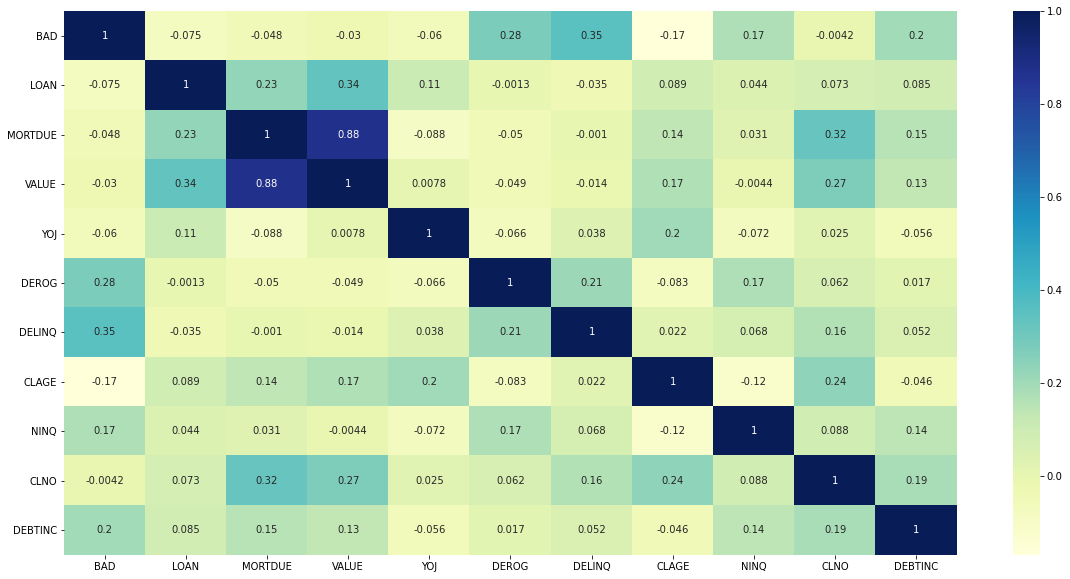

In [204]:
# Increase plot size
plt.figure(figsize=(20, 10))

# Heatmap: Comparing numerical values
sns.heatmap(data = df.select_dtypes(include=np.number).corr(), annot=True, cmap='YlGnBu')
plt.show()

<b>Observations:</b>
- There is a strong positive correlation between the value of the property and the amount due on the existing mortgage. This makes sense because if the property is more expensive, the mortgage is going to be bigger.
- There are no other strong correlations between numerical variables.

## Treating Outliers

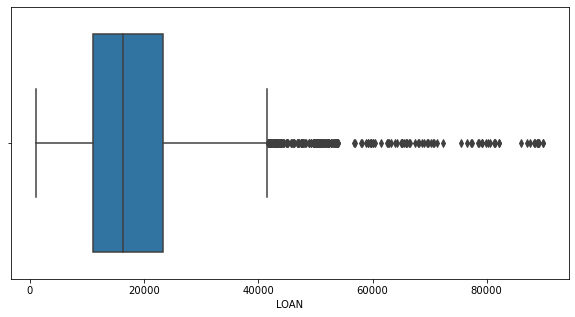

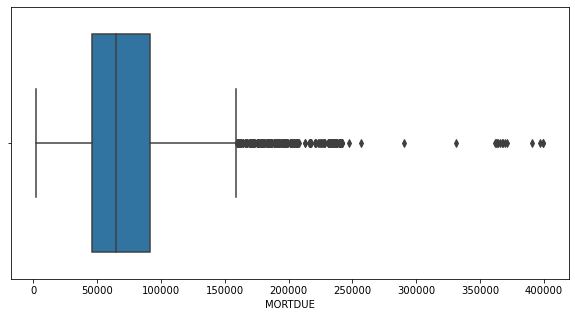

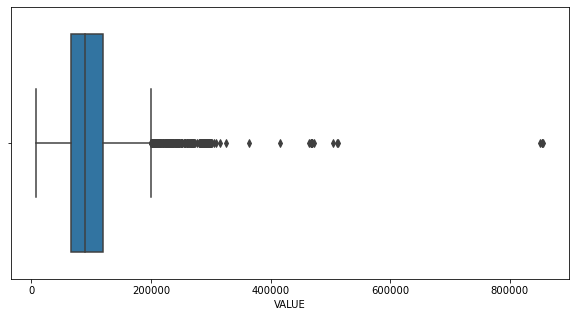

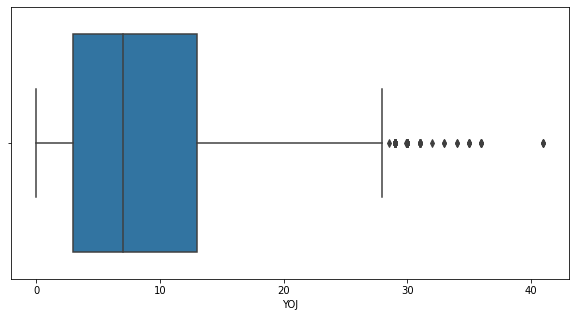

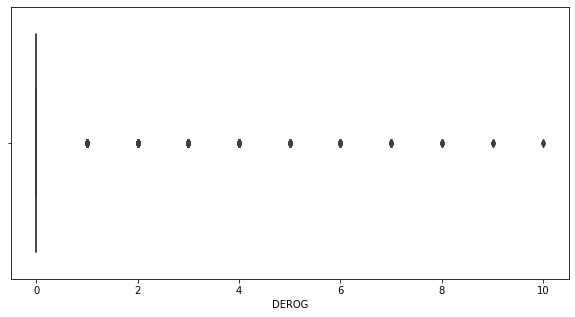

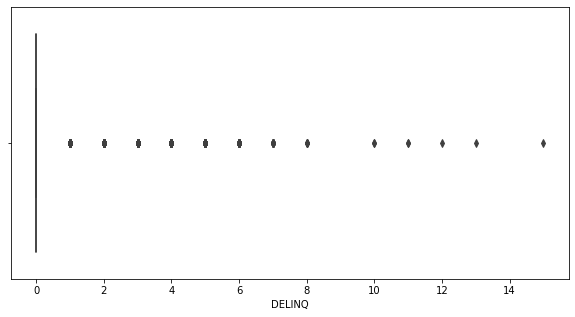

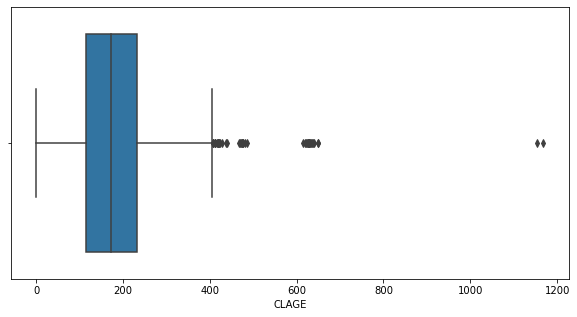

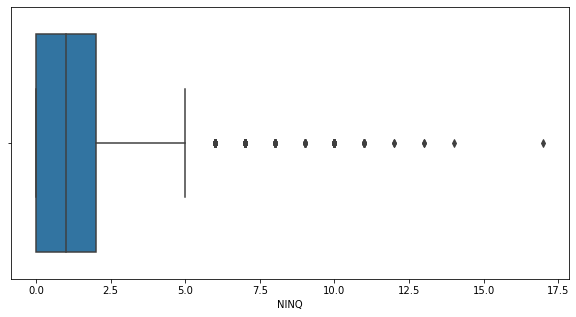

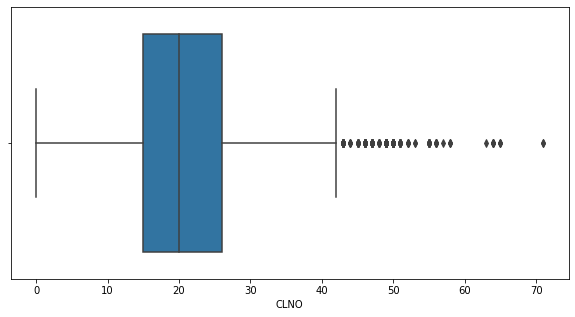

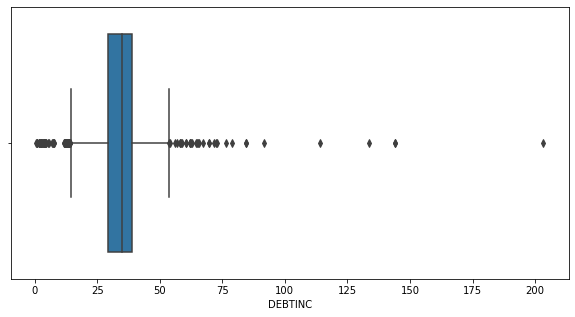

In [205]:
# Outlier detection using boxplots, excluding BAD
for i in ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']:
    # Increase plot size
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[i])
    plt.show()

<b>Observations:</b>
- There are outliers present in every numerical category.
- Not all outliers should be treated, some might introduce bias if treated.
- Clear outliers that we can deal with can be spotted in the current property value column, years at present job column, age of the oldest credit line in months column, and debt-to-income ratio column.

In [206]:
# Outliers treatment for VALUE
# Formula to calculate IQR: q3 - q1
q1 = df["VALUE"].quantile(0.25)
q3 = df["VALUE"].quantile(0.75)
iqr = q3 - q1

# Formula to calculate upper whisker: q3 + 1.5 * IQR
whisker = q3 + 1.5 + iqr

df.loc[df["VALUE"] > 600000, "VALUE"] = whisker

In [207]:
# Outliers treatment for YOJ
# Formula to calculate IQR: q3 - q1
q1 = df["YOJ"].quantile(0.25)
q3 = df["YOJ"].quantile(0.75)
iqr = q3 - q1

# Formula to calculate upper whisker: q3 + 1.5 * IQR
whisker = q3 + 1.5 + iqr

df.loc[df["YOJ"] > 40.00, "YOJ"] = whisker

In [208]:
# Outliers treatment for CLAGE
# Formula to calculate IQR: q3 - q1
q1 = df["CLAGE"].quantile(0.25)
q3 = df["CLAGE"].quantile(0.75)
iqr = q3 - q1

# Formula to calculate upper whisker: q3 + 1.5 * IQR
whisker = q3 + 1.5 + iqr

df.loc[df["CLAGE"] > 1000, "CLAGE"] = whisker

In [209]:
# Outliers treatment for DEBTINC
# Formula to calculate IQR: q3 - q1
q1 = df["DEBTINC"].quantile(0.25)
q3 = df["DEBTINC"].quantile(0.75)
iqr = q3 - q1

# Formula to calculate upper whisker: q3 + 1.5 * IQR
whisker = q3 + 1.5 + iqr

df.loc[df["DEBTINC"] > 150, "DEBTINC"] = whisker

<b>Observations:</b>
- This outliers treatment works by matching outliers to the upper whisker.
- Since the current property value variable is continuous and has noticeable outliers above 600000, we perform outlier treatment on it.
- Since the years at present job variable is continuous and has noticeable outliers above 40, we perform outlier treatment on it.
- Since the age of the oldest credit line in months variable is continuous and has noticeable outliers above 1000, we perform outlier treatment on it.
- Since the debt-to-income ratio is continuous and has noticeable outliers above 150, we perform outlier treatment on it.

## Treating Missing Values

In [210]:
# Missing values check
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

<b>Observations:</b>
- This dataset has a lot of missing values.
- Only 2 columns do not have missing values, BAD and LOAN.
- Need to keep in mind that introducing missing values treatment such as imputation might result in bias.

In [211]:
# Impute missing values using mean, median and mode
df['MORTDUE'] = df['MORTDUE'].fillna(df['MORTDUE'].mean())
df['VALUE'] = df['VALUE'].fillna(df['VALUE'].mean())
df['REASON'] = df['REASON'].fillna(df['REASON'].mode().iloc[0])
df['JOB'] = df['JOB'].fillna(df['JOB'].mode().iloc[0])
df['YOJ'] = df['YOJ'].fillna(df['YOJ'].median())
df['DEROG'] = df['DEROG'].fillna(df['DEROG'].median())
df['DELINQ'] = df['DELINQ'].fillna(df['DELINQ'].median())
df['CLAGE'] = df['CLAGE'].fillna(df['CLAGE'].mean())
df['NINQ'] = df['NINQ'].fillna(df['NINQ'].median())
df['CLNO'] = df['CLNO'].fillna(df['CLNO'].median())
df['DEBTINC'] = df['DEBTINC'].fillna(df['DEBTINC'].mean())

# Missing values check
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

<b>Observations:</b>
- Treated missing values in the dataset using mean, median and mode of variables.
- Used mean for MORTDUE, VALUE, CLAGE, DEBTINC. 
- Used median for YOJ, DEROG, DELINQ, NINQ, and CLNO.
- Used mode for object type variables: REASON and JOB.
- All missing values have been treated.

## **Important Insights from EDA**

- The number of rows in the database is 5960 and the number of columns is 13.
- There are 11 numerical columns (9 floats, 2 integers) and 2 object type columns.
- 80% of applicants repaid their loans. 20% defaulted on their loans, which is only 1/5 of all applicants, so there is a class imbalance that needs to be handled carefully, either by adjusting class weights or using a resampling technique.
- 69% of applicants requested a loan for debt consolidation, 31% requested a loan for home improvement. The loan purpose is an important feature and plays a significant role in default risk.
- There is a strong positive correlation between the value of the property and the amount due on the existing mortgage, but defaulters tend to have lower mortgage amounts. This could potentially be indicating over-leveraging by the applicants.
- Job categories and work experience in years are applicant profiles that provide insights into financial stability and repayment likelihood.
- All columns have missing values except BAD and LOAN columns. Handling missing data is important for maintaining model integrity. Specifically in the case of DELINQ where there is a significant amount of missing data (1267 rows).
- No duplicates were found in the data frame.

## **Model Building - Approach**

<b>Data preparation</b>

In [212]:
# Seperate independent variables
x = df.drop('BAD', axis = 1)
# Seperate target variable
y = df['BAD']

In [213]:
# Represent categorical variables with 1s and 0s
x = pd.get_dummies(x, drop_first = True)

<b>Partition the data into train and test set</b>

In [214]:
# Split into training and testing data
# Using 30% of data for testing as this is the standard
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, shuffle = True)

In [215]:
# Make sure data remains the correct size, together [4612 rows x 16 columns]
print("Training dataset:", x_train.shape)
print("Testing dataset:", x_test.shape)

Training dataset: (4172, 16)
Testing dataset: (1788, 16)


In [216]:
# Confusion matrix and classification report function
def metrics_score(actual, predicted):
    # Print classification report: precision, recall, f1-score, support
    print(classification_report(actual, predicted))

    # Create confusion matrix variable
    cm = confusion_matrix(actual, predicted)

    # Set plot size
    plt.figure(figsize = (8, 5))

    # Create a heatmap for the confusion matrix
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Loan repaid', 'Loan defaulted'], yticklabels = ['Loan repaid', 'Loan defaulted'])
    
    # Label axes
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression

In [217]:
# Build a logistic regression model
lr = LogisticRegression(random_state=1)
# Fit the model on training data
lr.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [218]:
# Checking performance on the training data
pred_y_train = lr.predict(x_train)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1416
           1       0.68      0.66      0.67       372

    accuracy                           0.86      1788
   macro avg       0.79      0.79      0.79      1788
weighted avg       0.86      0.86      0.86      1788



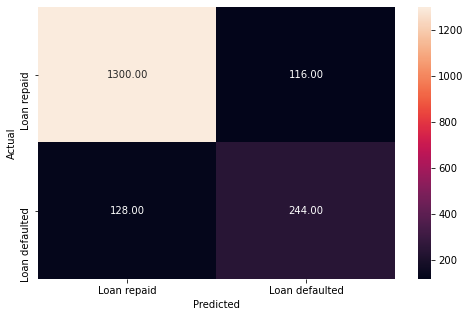

In [219]:
# Checking performance on the test data
pred_y_test = dt.predict(x_test)
metrics_score(y_test, pred_y_test)

<b>Observations:</b>
- The accuracy of this model is 86%.
- For loan repaid, precision, recall, and f1-score are all high, 91%, 92%, and 91% respectively.
- For loan defaulted, precision, recall, and f1-score were not as high, 68%, 66%, and 67% respectively.
- This indicates an imbalance in the weights between defaulted and repaid loans. Repaid loans are the majority.
- Noticible overfitting.

### Decision Tree

In [220]:
# Build a decision tree classifier
dt = DecisionTreeClassifier(random_state = 1)
# Fit the classifier on training data
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



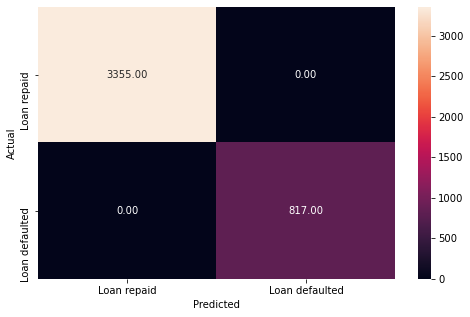

In [221]:
# Checking performance on the training data
pred_y_train = dt.predict(x_train)
metrics_score(y_train, pred_y_train)

<b>Observations:</b>
- The accuracy and other parameters are all 100%, which means that it is perfect.
- These insights are a bit concerning, there might be a risk of model overfitting.

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1416
           1       0.68      0.66      0.67       372

    accuracy                           0.86      1788
   macro avg       0.79      0.79      0.79      1788
weighted avg       0.86      0.86      0.86      1788



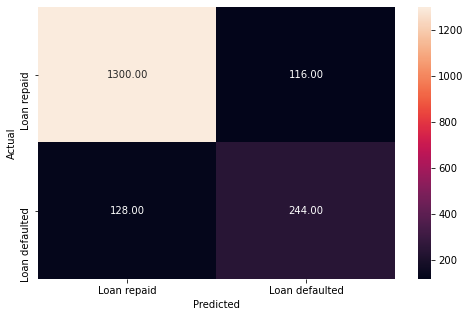

In [222]:
# Checking performance on the test data
pred_y_test = dt.predict(x_test)
metrics_score(y_test, pred_y_test)

<b>Observations:</b>
- The accuracy of this model is 86%.
- For loan repaid, precision, recall, and f1-score are all high, 91%, 92% and 91% respectively.
- For loan defaulted, precision, recall and f1-score were not as high, 68%, 66% and 67% respectively.
- This indicates an imbalance in the weights between defaulted and repaid loans. Repaid loans are the majority.
- Need to fix overfitting.

### **Decision Tree - Hyperparameter Tuning**

In [223]:
# Hyperparameter tuning
tuned_dt = DecisionTreeClassifier(class_weight = {0: 0.20, 1: 0.80}, random_state = 1)

parameters = {
    'max_depth': np.arange(2,20),
    'min_samples_leaf': np.arange(5,10),
    'criterion': ['gini', 'entropy']
}

# Use recall to catch all defaulters
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Perform grid search
grid_obj = GridSearchCV(tuned_dt, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(x_train, y_train)

# Classifier is set to the best combination of parameters
tuned_dt = grid_obj.best_estimator_

# Best algorithm fit to the data
tuned_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=9, min_samples_leaf=8, random_state=1)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3355
           1       0.63      0.89      0.74       817

    accuracy                           0.87      4172
   macro avg       0.80      0.88      0.83      4172
weighted avg       0.90      0.87      0.88      4172



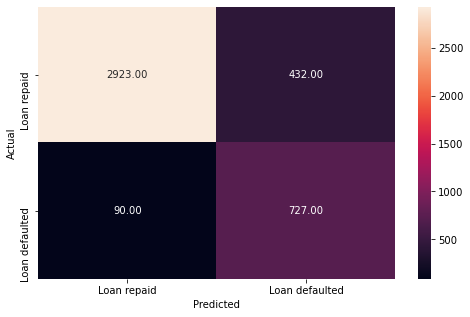

In [224]:
# Checking performance on the training data
pred_y_train_tuned = tuned_dt.predict(x_train)
metrics_score(y_train, pred_y_train_tuned)

<b>Observations:</b>
- After performing hyperparameter tuning, the accuracy of training data has decreased by 13%.
- This is because we reduced the complexity of the tree by setting max_depth to 9.
- Since we reduced overfitting, the accuracy also decreased on a training set.

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1416
           1       0.58      0.76      0.66       372

    accuracy                           0.83      1788
   macro avg       0.75      0.81      0.77      1788
weighted avg       0.86      0.83      0.84      1788



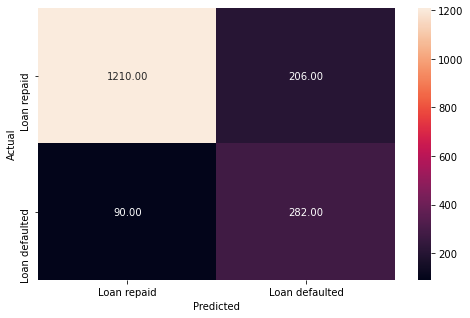

In [225]:
# Checking performance on the test data
pred_y_test_tuned = tuned_dt.predict(x_test)
metrics_score(y_test, pred_y_test_tuned)

<b>Observations:</b>
- The accuracy has decreased by 3% compared to the previous Decision Tree model.
- The recall for loan defaults has increased by 10% compared to the previous model. The precision has decreased by 10%.
- The recall on the loan repaid has decreased by 7%. The precision has increased by 2%.
- For our solution, we are focusing on finding applicants who will default on loans. We do not mind sacrificing some false positives where someone might have been able to repay the loan but was not identified as such.

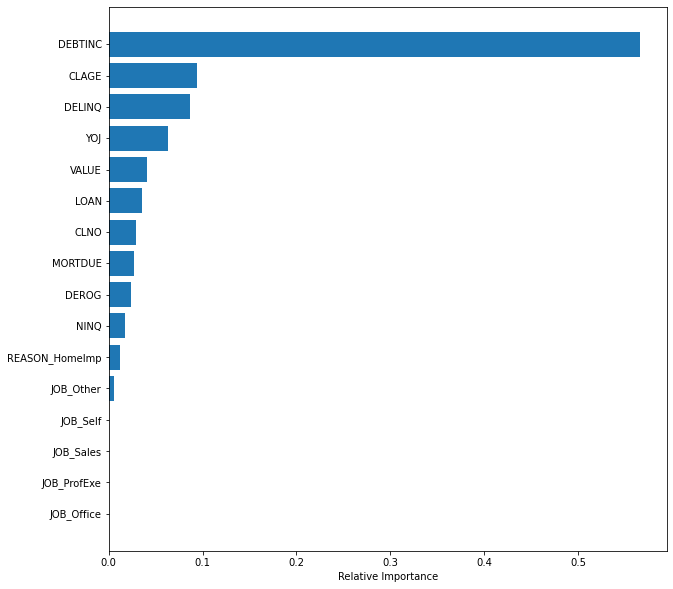

In [226]:
# Checking feature importance
importances = tuned_dt.feature_importances_
indices = np.argsort(importances)

names = list(x.columns)

plt.figure(figsize = (10, 10))
plt.barh(range(len(indices)), importances[indices])

plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<b>Observations:</b>
- The features importance bar plot indicates the most important features that determine if the applicant will default on a loan or not.
- By far the most important feature identified is the debt-to-income ratio.
- It is followed by the number of delinquent credit lines, the age of the oldest credit inquiries, and the number of major derogatory reports (indicates very serious delinquency). These three all indicate negligence towards repaying loans.
- Then less important features follow such as years at present job, number of existing credit lines, if the reason for loan was a home improvement, and number of recent credit inquiries.
- Least important feature is the type of job a person has.

### **Building a Random Forest Classifier**

In [227]:
# Build a random forest tree classifier
rf = RandomForestClassifier(random_state = 1)
# Fit the classifier on training data
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



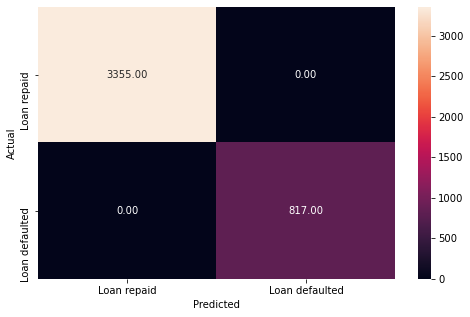

In [228]:
# Checking performance on the train data
pred_y_train = rf.predict(x_train)
metrics_score(y_train, pred_y_train)

<b>Observations:</b>
- The accuracy and all of the other parameters are 100%, which means that it is perfect.
- These insights are a bit concerning, there might be a risk of model overfitting.

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1416
           1       0.92      0.67      0.77       372

    accuracy                           0.92      1788
   macro avg       0.92      0.83      0.86      1788
weighted avg       0.92      0.92      0.91      1788



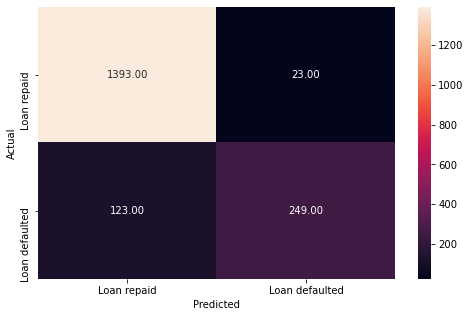

In [229]:
# Checking performance on the test data
pred_y_test = rf.predict(x_test)
metrics_score(y_test, pred_y_test)

<b>Observations:</b>
- Overall accuracy is 92%. This is higher than both Decision Tree models (tuned and not).
- For loan repaid, precision, recall and f1-score are all high, 92%, 98% and 95% respectively.
- For loan defaulted, precision, recall and f1-score were not as high, 92%, 67% and 77% respectively.
- For loan defaulted, the precision is a lot higher than recall which indicates fewer false positives, but also missing some true positives. We want to focus on the opposite. We need to increase recall even if precision suffers a bit.
- The f1-score was higher for oan repaid than loan defaulted, this means the model better identifies customers who repay loans but in our case it is more important to identify customers who default on loans.
- Need to fix overfitting.

### **Random Forest Classifier Hyperparameter Tuning**

In [230]:
tuned_rf = RandomForestClassifier(class_weight = {0: 0.20, 1: 0.80}, random_state = 1, criterion = 'entropy')

parameters = {
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [100, 110],
    'max_features': [None, 0.8, 1]
}

# Use recall to catch all defaulters
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Perform grid search
grid_obj = GridSearchCV(tuned_rf, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(x_train, y_train)

# Classifier is set to the best combination of parameters
tuned_rf = grid_obj.best_estimator_

# Best algorithm fit to the data
tuned_rf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=5, max_features=0.8, n_estimators=110,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3355
           1       0.65      0.81      0.72       817

    accuracy                           0.88      4172
   macro avg       0.80      0.85      0.82      4172
weighted avg       0.89      0.88      0.88      4172



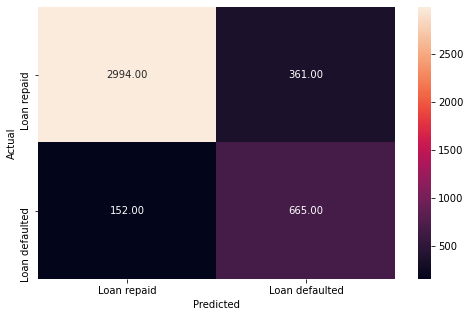

In [231]:
# Checking performance on the training data
pred_y_train_tuned = tuned_rf.predict(x_train)
metrics_score(y_train, pred_y_train_tuned)

<b>Observations:</b>
- After performing hyperparameter tuning, the accuracy of training data has decreased by 12%.
- This is because we reduced the complexity of the tree by setting max_depth to 5.
- Since we reduced overfitting, the accuracy also decreased on a training set.

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1416
           1       0.65      0.74      0.69       372

    accuracy                           0.86      1788
   macro avg       0.79      0.82      0.80      1788
weighted avg       0.87      0.86      0.87      1788



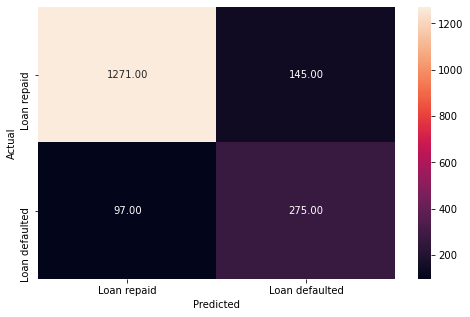

In [232]:
# Checking performance on the test data
pred_y_test_tuned = tuned_rf.predict(x_test)
metrics_score(y_test, pred_y_test_tuned)

<b>Observations:</b>
- The accuracy has decreased by 6% compared to the previous Random Forest model.
- The recall for loan defaults has increased by 7% compared to the previous model. However, the precision has decreased by a major 27%.
- The recall on the loan repaid has decreased by 8%. The precision has decreased by 1%.
- Overall, hyper tuning random forest model only increased the recall for loan defaults by 7% and decreased the accuracy of all of the other parameters.
- Since precision for loan defaults dropped significantly, it might not be advisable to use this model as too many potential customers could be lost even if recall did improve slightly.

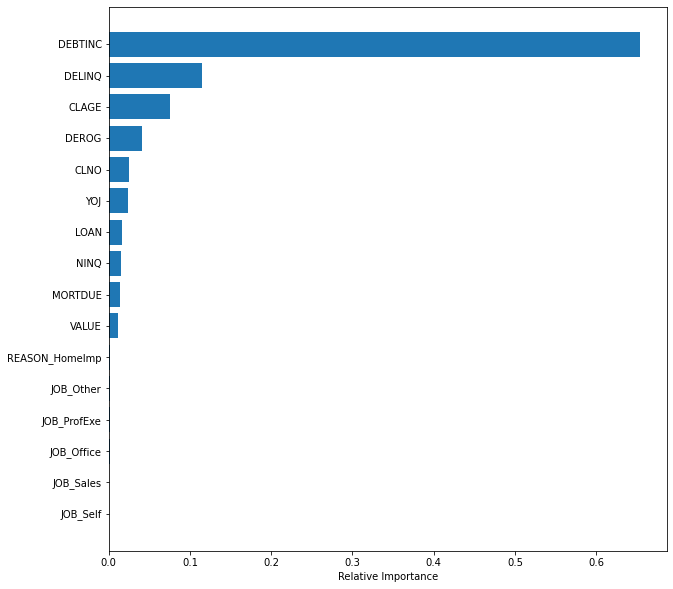

In [233]:
# Checking feature importance
importances = tuned_rf.feature_importances_
indices = np.argsort(importances)

names = list(x.columns)

plt.figure(figsize = (10, 10))
plt.barh(range(len(indices)), importances[indices])

plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<b>Observations:</b>
- The features importance bar plot indicates the most important features that determine if the applicant will default on a loan or not.
- By far the most important feature identified is the debt-to-income ratio.
- It is followed by the the age of the oldest credit lines, and the number of delinquent lines. These both indicate negligence towards repaying loans.
- Then in descending order, there is the amount of loans approved, mortgage amount, the number of existing credit lines, current value of the property, and years at the present job respectively.
- The least important feature is the type of job a person has.

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 

- Logistic Regression:  precision    recall  f1-score   support

           0       0.91      0.92      0.91      1416
           1       0.68      0.66      0.67       372
- Decision Tree:  precision    recall  f1-score   support

           0       0.91      0.92      0.91      1416
           1       0.68      0.66      0.67       372
- Decision Tree Tuned:  precision    recall  f1-score   support

           0       0.93      0.85      0.89      1416
           1       0.58      0.76      0.66       372
- Random Forest:  precision    recall  f1-score   support

           0       0.92      0.98      0.95      1416
           1       0.92      0.67      0.77       372
- Random Forest Tuned:  precision    recall  f1-score   support

           0       0.93      0.90      0.91      1416
           1       0.65      0.74      0.69       372
- The worst recall for loan defaults is with logistic regression and decision tree predictive models.
- The technique that performs best in terms of loan default recall is the decision tree tuned prediction model.
- The performance could potentially be further improved by pruning the tree.

**2. Refined insights:** 
- The number of rows in the database is 5960 and the number of columns is 13.
-	There are 11 numerical columns (9 floats, 2 integers)
-	There are 2 object type columns
-	All columns have missing values except from BAD and LOAN columns
-	DEBTINC has the most missing values, 1267 of them.
-	No duplicates were found in the data frame
-	BAD, REASON, and JOB are categorical values.
-	LOAD, MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, and DEBTINC are continuous variables.
-	There are no columns that should be dropped because none of them have 5960 unique vastribution.
-	80% of applicants repaid their loans. 20% defaulted on their loans, that is only 1/5 of all applicants.
-	69% of applicants requested a loan for debt consolidation, 31% requested a loan for home improvement.
-	Almost half (42%) of all applicants work in other sectors than the ones listed. 22% work as professional executives, 17% work at offices, 14% work in migration, 3% are self-employed and 2% of all applicants are in sales.
-	Most applicants take out loans worth about $16000 judging from the histogram.
-	Most applicants (850) have little to no work experience, up to a year at their present job.
-	There are two categories when choosing the reason for a loan, home improvement or debt consolidation.
-	4000 applicants took out the loan for debt consolidation, which is two times more than 1800 of applicants who took out the loan for home improvement.
-	There are 6 job categories for applicants: Self, professional executive, migration, sales, office and other.
-	Most applicants (2400) have other occupations, that is two times more than the next most popular job which is professional executive with 1400 people. It is followed by office, migration, self employed and sales in descending order.
-	A higher percentage of people, about 25% defaulted on loans when the reason for their loan was home improvement compared to those whose reasons were debt consolidation (20%).
-	This could be caused by unexpected expenses that arise when doing home improvements or because it is likely that people who took out loans to repay their other liabilities, took out other loans to repay this one.
-	There is no significant difference in loan amount between people who repay the loan and those who default.
-	On average, those who repay their loans have properties of higher value, over 100000 USD.
-	There is a slight negative correlation between property value and loan repayment.
-	Those who default have on average lower amount of mortgage, about 65000 USD, than those who repay their loan, about an average of 75000 USD.
-	This might be because they use up all of their loan to repay their mortgage and then are unable to repay the loan.
-	There is a strong positive correlation between the value of the property and the amount due on the existing mortgage. This makes sense because if the property is more expensive, the mortgage is going to be bigger.

- By far the most important feature identified is the debt-to-income ratio.

**3. Proposal for the final solution design:** 

For the final design, I would suggest adopting a model where recall is prioritized. I think we should focus on recall because we want to predict defaulters accurately even if it means missing some potential applicants who would have repaid their loans and classifying them as defaulters. Based on these criteria, I would propose to adopt a tuned decision tree model. It has the highest recall for loan defaults, 76%. The model is good enough for deployment in production.

## **Problem and solution summary**

<b> Problem: </b>
Loan defaults pose a serious risk to banks, and identifying the applicants most likely to fail is vital to minimising losses. The dataset contains loan application data, and the goal is to build a model that predicts whether an applicant will default.

<b> Solution: </b>
To understand the dataset, I first overviewed the data. I checked the dimensions of the dataset, variable types, missing values, unique values and duplicates. After, I performed univariate, bivariate, and multivariate analyses to visualise the data. This enabled me to investigate and understand the data better before building a model with it.

Following the visualisations, I performed data preprocessing. I detected outliers and treated them accordingly. Since there were no missing values, I did not treat them. Data preprocessing allowed me to prepare data for modelling.

I split testing and training data into 30% and 70% respectively. I created a logistic regression model, a decision tree model, a tuned decision tree model, a random forest model and a tuned random forest model.

When investigating logistic regression model performance I observed that the model's accuracy was only 86%. For loan repaid, precision, recall, and f1-score were all high, 91%, 92%, and 91% respectively. For loan defaulted, precision, recall, and f1-score were not as high, 68%, 66%, and 67% respectively. This indicates an imbalance in the weights between defaulted and repaid loans. Repaid loans are the majority. There is noticeable overfitting.

After investigating a decision tree model performance I observed that the model's accuracy was only 86%. For loan repaid, precision, recall, and f1-score are all high, 91%, 92% and 91% respectively. For loan defaulted, precision, recall and f1-score were not as high, 68%, 66% and 67% respectively. This indicates an imbalance in the weights between defaulted and repaid loans. Repaid loans are the majority. We need to fix overfitting. To improve the model I performed hyperparameter tuning using GridSearchCV. The accuracy has decreased by 3% compared to the previous Decision Tree model. The recall for loan defaults has increased by 10% compared to the previous model. The precision has decreased by 10%. The recall on the loan repaid has decreased by 7%. The precision has increased by 2%. For our solution, we are focusing on finding applicants who will default on loans. We do not mind sacrificing some false positives where someone might have been able to repay the loan but was not identified as such.

Additionally, I built a random forest model. The accuracy of this model was higher compared to both decision tree models (tuned and not), it was 92%. However, this model was also overfitting and the loan defaulted recall was only 67%, this is our biggest concern. To improve this model I performed hyperparameter tuning using GridSearchCV too. After tuning, the recall has increased by 7% compared to the basic random forest model. The accuracy has decreased by 6% compared to the previous random forest model. The recall for loan defaults has increased by 7% compared to the previous model. However, the precision has decreased by a major 27%. The recall on the loan repaid has decreased by 8%. The precision has decreased by 1%. Overall, hyper tuning random forest model only increased the recall for loan defaults by 7% and decreased the accuracy of all of the other parameters. Since precision for loan defaults dropped significantly, it might not be advisable to use this model as too many potential customers could be lost even if recall did improve slightly.

<b> Final solution: </b>
The choice to concentrate on recall guarantees that the bank finds the majority of defaulters, which is essential for reducing risk. This strategy guarantees that few defaulters avoid detection despite a reduction in accuracy, which is consistent with the bank's aim to reduce losses. A tuned decision tree classifier prioritises recall the most compared to the other models. The model's emphasis on maximising recall can assist the bank in minimising the amount of loan defaults that go unnoticed, thus preventing the most expensive situations. This approach will lower financial losses and enhance loan-issuing decision-making, allowing the bank to manage its collection of loans more effectively.

## **Recommendations for implementation**
Implement the tuned Decision Tree model in a production environment. Make sure the model can process real-time loan application data as well as large datasets. Furthermore, to maintain performance and fix the class imbalance, train the model on updated data regularly. The bank is expected to incur charges for retraining, maintenance, and updates to its IT infrastructure as part of the hypothetical \\$100,000–$150,000 deployment of the model.

Based on our analysis, 80% of applicants repaid their loans. 20% defaulted on their loans, which is only 1/5 of all applicants, so there is a class imbalance. If we collect more data on new customers, we could potentially reduce the class imbalance leading to even more accurate results. Since 20% of applicants default on loans and the tuned decision tree model captures 76% of them, our model can help avoid approximately 15.2% of potential loan losses annually. If the bank typically issues \\$100 million in loans per year, the potential savings from fewer defaults could range from \\$10-15 million per year, assuming an average loan size of \\$10,000.

69% of applicants requested a loan for debt consolidation, and 31% requested a loan for home improvement. The loan purpose is an important feature and plays a significant role in default risk and should not be overlooked. The bank should focus on higher-risk applicants in the debt consolidation category and adjust loan terms accordingly.

There is a strong positive correlation between the value of the property and the amount due on the existing mortgage, but defaulters tend to have lower mortgage amounts. This could potentially be indicating over-leveraging by the applicants. This finding should inform risk-based pricing strategies, allowing the bank to adjust interest rates or request collateral based on the applicant's mortgage and property values.

Job categories and work experience in years are applicant profiles that provide insights into financial stability and repayment likelihood, this is additional data that should be collected.

The features importance bar plot indicates the most important features that determine if the applicant will default on a loan or not. By far the most important feature identified is the debt-to-income ratio. It is followed by the number of delinquent credit lines, the age of the oldest credit inquiries, and the number of major derogatory reports (indicates very serious delinquency). These three all indicate negligence towards repaying loans. Then less important features follow such as years at present job, number of existing credit lines, if the reason for loan was a home improvement, and number of recent credit inquiries. The least important feature is the type of job a person has. Based on this bar plot, the bank should put more focus on the debt-to-income ratio as this was indicated as the most important feature. Maybe if more information in this category was collected, the accuracy of our model could be improved as well, making predictions more accurate overall with fewer financial losses.

Costs associated with this solution include model implementation costs, data maintenance costs and maybe losing some potential low-risk customers because we are focusing on finding all users who default. The risks associated with this solution are overfitting, most models were overfitting before hyperparameter tuning, this could happen in the future if not enough data is collected or it is very imbalanced. The model also must comply with banking regulations like the Equal Credit Opportunity Act to ensure that it does not introduce bias or unfairly discriminate against certain applicant groups. This would have to be tested before production. The data needs to be updated regularly to make sure the model is accurate and conforms to the current norms and demands.

Further analysis could be performed to reveal how new and old features interact with each other after the solution has been deployed and some time has passed. The most important feature might change with time or some insignificant features might become more significant so it is vital to understand how those features interact. Additionally, since there is a strong class imbalance, as more data gets collected it should be closely monitored.